<a href="https://colab.research.google.com/github/yemoche/ASSIGNMENT4JAVASCRIPT/blob/main/pract1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

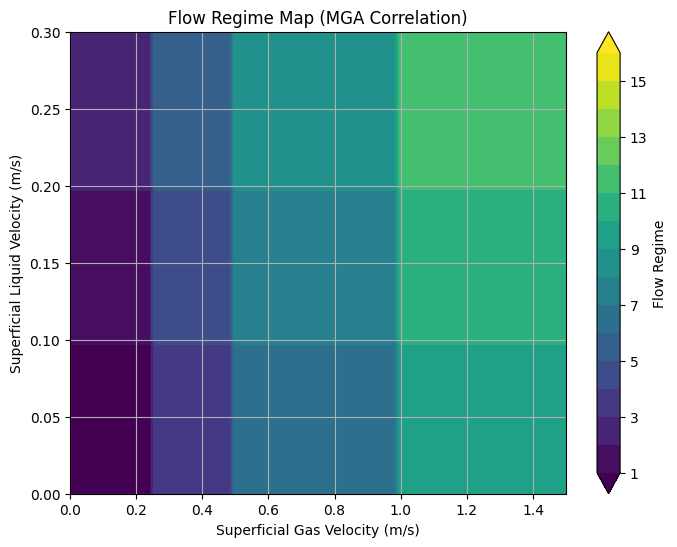

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define velocity ranges for different flow regimes
U_range = [0, 0.25, 0.5, 1.0, np.inf]
V_range = [0, 0.1, 0.2, np.inf]

# Create a meshgrid for U and V values
U, V = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(0, 0.3, 100))

# Assign flow regime based on U and V values
flow_regime = np.zeros_like(U, dtype=int)

for i in range(len(U_range) - 1):
    for j in range(len(V_range) - 1):
        mask = ((U >= U_range[i]) & (U < U_range[i+1]) & (V >= V_range[j]) & (V < V_range[j+1]))
        flow_regime[mask] = i * (len(V_range) - 1) + j + 1

# Plot the flow regime map
plt.figure(figsize=(8, 6))
plt.contourf(U, V, flow_regime, cmap='viridis', levels=np.arange(1, 17, 1), extend='both')
plt.xlabel('Superficial Gas Velocity (m/s)')
plt.ylabel('Superficial Liquid Velocity (m/s)')
plt.title('Flow Regime Map (MGA Correlation)')
plt.colorbar(label='Flow Regime')
plt.grid(True)
plt.show()


Taitel & ducker flow regime map template

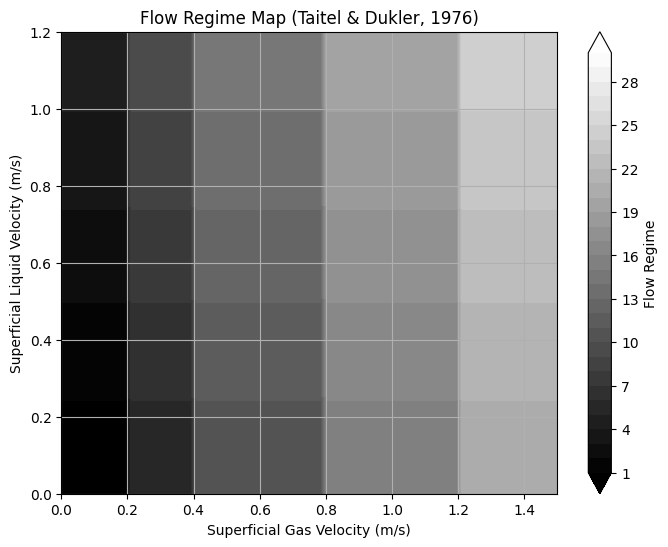

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define velocity ranges for different flow regimes
Superficial_gas_velocity_range = [0, 0.2, 0.4, 0.8, 1.2, np.inf]
Superficial_liquid_velocity_range = [0, 0.25, 0.5, 0.75, 1.0, np.inf]

# Create a meshgrid for U and V values
U, V = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(0, 1.2, 100))

# Assign flow regime based on U and V values
flow_regime = np.zeros_like(U, dtype=int)

for i in range(len(Superficial_gas_velocity_range) - 1):
    for j in range(len(Superficial_liquid_velocity_range) - 1):
        mask = (
            (U >= Superficial_gas_velocity_range[i]) & (U < Superficial_gas_velocity_range[i+1]) &
            (V >= Superficial_liquid_velocity_range[j]) & (V < Superficial_liquid_velocity_range[j+1])
        )
        flow_regime[mask] = i * (len(Superficial_liquid_velocity_range) - 1) + j + 1

# Plot the flow regime map
plt.figure(figsize=(8, 6))
plt.contourf(U, V, flow_regime, cmap='gray', levels=np.arange(1, 31, 1), extend='both')
plt.xlabel('Superficial Gas Velocity (m/s)')
plt.ylabel('Superficial Liquid Velocity (m/s)')
plt.title('Flow Regime Map (Taitel & Dukler, 1976)')
plt.colorbar(label='Flow Regime')
plt.grid(True)
plt.show()


Taiter & duckler second approach

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


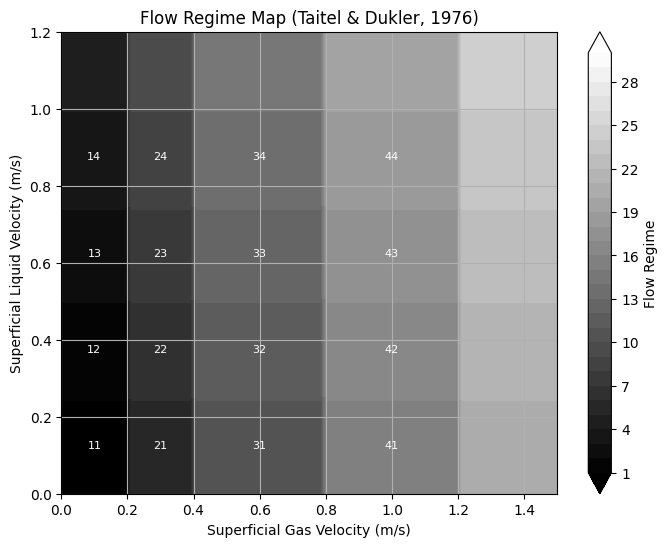

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define velocity ranges for different flow regimes
Superficial_gas_velocity_range = [0, 0.2, 0.4, 0.8, 1.2, np.inf]
Superficial_liquid_velocity_range = [0, 0.25, 0.5, 0.75, 1.0, np.inf]

# Create a meshgrid for U and V values
U, V = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(0, 1.2, 100))

# Assign flow regime based on U and V values
flow_regime = np.zeros_like(U, dtype=int)

# Store coordinates and labels for annotations
annotations = []

for i in range(len(Superficial_gas_velocity_range) - 1):
    for j in range(len(Superficial_liquid_velocity_range) - 1):
        mask = (
            (U >= Superficial_gas_velocity_range[i]) & (U < Superficial_gas_velocity_range[i+1]) &
            (V >= Superficial_liquid_velocity_range[j]) & (V < Superficial_liquid_velocity_range[j+1])
        )
        flow_regime[mask] = i * (len(Superficial_liquid_velocity_range) - 1) + j + 1

        # Store coordinates and labels for annotations
        center_U = (Superficial_gas_velocity_range[i] + Superficial_gas_velocity_range[i+1]) / 2
        center_V = (Superficial_liquid_velocity_range[j] + Superficial_liquid_velocity_range[j+1]) / 2
        annotations.append((center_U, center_V, f'{i+1}{j+1}'))

# Plot the flow regime map with annotations
plt.figure(figsize=(8, 6))
plt.contourf(U, V, flow_regime, cmap='gray', levels=np.arange(1, 31, 1), extend='both')
plt.xlabel('Superficial Gas Velocity (m/s)')
plt.ylabel('Superficial Liquid Velocity (m/s)')
plt.title('Flow Regime Map (Taitel & Dukler, 1976)')

# Add annotations
for annotation in annotations:
    plt.text(annotation[0], annotation[1], annotation[2], color='white', ha='center', va='center', fontsize=8)

plt.colorbar(label='Flow Regime')
plt.grid(True)
plt.show()


In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access files in Google Drive
path_to_file = '/content/drive/My Drive/flu1.csv'



Mounted at /content/drive


In [148]:
!pip install plotly

testing small datasets for multiphase fluid

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go


# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv(path_to_file)
df.head()
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   System No.                            268 non-null    int64  
 1   System                                268 non-null    object 
 2   Liquid Density (ppg)                  268 non-null    float64
 3   Liquid Viscosity (Cp)                 268 non-null    int64  
 4   Surface Tension (mN/m)                268 non-null    float64
 5   Liquid Superficial Velocity (ft/sec)  268 non-null    float64
 6   Gas Superficial Velocity (ft/sec)     268 non-null    float64
 7   Main Flow Patterns                    268 non-null    object 
 8   Sub-Classification                    268 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 19.0+ KB


In [94]:
df.isnull().sum()

System No.                              0
System                                  0
Liquid Density (ppg)                    0
Liquid Viscosity (Cp)                   0
Surface Tension (mN/m)                  0
Liquid Superficial Velocity (ft/sec)    0
Gas Superficial Velocity (ft/sec)       0
Main Flow Patterns                      0
Sub-Classification                      0
dtype: int64

In [95]:
df.describe()

,System No.,Liquid Density (ppg),Liquid Viscosity (Cp),Surface Tension (mN/m),Liquid Superficial Velocity (ft/sec),Gas Superficial Velocity (ft/sec)
count,268.0,2.680000e+02,268.0,268.0,268.000000,268.000000
mean,1.0,8.330000e+00,1.0,70.5,2.749704,22.915823
std,0.0,1.779680e-15,0.0,0.0,2.521589,17.201306
min,1.0,8.330000e+00,1.0,70.5,0.161953,1.079686
25%,1.0,8.330000e+00,1.0,70.5,0.809764,9.717173
50%,1.0,8.330000e+00,1.0,70.5,1.619529,19.434345
75%,1.0,8.330000e+00,1.0,70.5,4.390714,30.573248
max,1.0,8.330000e+00,1.0,70.5,8.702394,61.146497


In [3]:
# checking the distribution of Target Variable
df['Main Flow Patterns'].value_counts()

Intermittent        203
Stratified           43
Annular              21
Dispersed Bubble      1
Name: Main Flow Patterns, dtype: int64

In [4]:
# removing a row data of dispersed bubble
# Class label to remove
class_label_to_remove = 'Dispersed Bubble'

# Use boolean indexing to remove rows with the specified class label
df = df[df['Main Flow Patterns'] != class_label_to_remove]
df['Main Flow Patterns'].value_counts()


Intermittent    203
Stratified       43
Annular          21
Name: Main Flow Patterns, dtype: int64

In [5]:
class_mapping = {'Intermittent': 0, 'Stratified': 1, 'Annular': 2}

# Create a new column 'EncodedClass' by mapping the original 'Class' column
df['EncodedClass'] = df['Main Flow Patterns'].map(class_mapping)

In [91]:
#performing scaling

# Select the columns to scale
columns_to_scale = ['Liquid Superficial Velocity (ft/sec)', 'Gas Superficial Velocity (ft/sec)']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame after scaling
print("DataFrame after Scaling:")
print(df)

DataFrame after Scaling:
     System No.     System  Liquid Density (ppg)  Liquid Viscosity (Cp)  \
0             1  Air-Water                  8.33                      1   
1             1  Air-Water                  8.33                      1   
2             1  Air-Water                  8.33                      1   
3             1  Air-Water                  8.33                      1   
4             1  Air-Water                  8.33                      1   
..          ...        ...                   ...                    ...   
263           1  Air-Water                  8.33                      1   
264           1  Air-Water                  8.33                      1   
265           1  Air-Water                  8.33                      1   
266           1  Air-Water                  8.33                      1   
267           1  Air-Water                  8.33                      1   

     Surface Tension (mN/m)  Liquid Superficial Velocity (ft/sec)  \
0    

In [6]:
df.head()

,System No.,System,Liquid Density (ppg),Liquid Viscosity (Cp),Surface Tension (mN/m),Liquid Superficial Velocity (ft/sec),Gas Superficial Velocity (ft/sec),Main Flow Patterns,Sub-Classification,EncodedClass
0,1,Air-Water,8.33,1,70.5,0.161953,1.079686,Stratified,Smooth Stratified,1
1,1,Air-Water,8.33,1,70.5,0.161953,3.239058,Stratified,Inertial wave,1
2,1,Air-Water,8.33,1,70.5,0.161953,6.478115,Stratified,Inertial wave,1
3,1,Air-Water,8.33,1,70.5,0.161953,9.717173,Stratified,Inertial wave,1
4,1,Air-Water,8.33,1,70.5,0.161953,12.956230,Stratified,Inertial wave,1


In [7]:
#starting to separate unwanted features from labels
columns_to_drop = ['Liquid Density (ppg)', 'Liquid Viscosity (Cp)', 'Sub-Classification', 'Surface Tension (mN/m)', 'System No.','System', 'Main Flow Patterns']
X = df.drop(columns=columns_to_drop)
Y = df['Main Flow Patterns']
X.head()



,Liquid Superficial Velocity (ft/sec),Gas Superficial Velocity (ft/sec),EncodedClass
0,0.161953,1.079686,1
1,0.161953,3.239058,1
2,0.161953,6.478115,1
3,0.161953,9.717173,1
4,0.161953,12.956230,1


In [8]:
# To carry out machine learning

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

X_test.head()

,Liquid Superficial Velocity (ft/sec),Gas Superficial Velocity (ft/sec),EncodedClass
82,1.803705,6.478115,0
4,0.161953,12.956230,1
74,1.619529,6.478115,0
93,2.666042,16.195288,0
267,8.702394,30.573248,2


In [9]:
X_train.head()

,Liquid Superficial Velocity (ft/sec),Gas Superficial Velocity (ft/sec),EncodedClass
249,6.115386,15.286624,0
228,2.666042,61.146497,0
226,2.666042,45.859873,0
105,4.390714,3.239058,0
251,6.115386,30.573248,0


In [11]:
print(X.shape, X_train.shape, X_test.shape)

(267, 3) (213, 3) (54, 3)


In [10]:
#using logistic regression
model = LogisticRegression()

In [12]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print(X_train_prediction)
print(Y_train)

['Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent' 'Annular'
 'Stratified' 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Stratified' 'Stratified' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Stratified' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Stratified' 'Intermittent' 'Intermittent' 'Intermittent'
 'Stratified' 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Stratified' 'Intermittent' 'Stratified' 'Intermittent'
 'Stratified' 'Intermittent' 'Intermittent' 'Stratified' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent' 'Stratified'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Interm

In [14]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [15]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(X_test_prediction)
print(Y_test)

['Intermittent' 'Stratified' 'Intermittent' 'Intermittent' 'Annular'
 'Intermittent' 'Intermittent' 'Stratified' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent' 'Stratified'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Stratified' 'Intermittent' 'Intermittent' 'Stratified'
 'Intermittent' 'Intermittent' 'Intermittent' 'Annular' 'Intermittent'
 'Intermittent' 'Intermittent' 'Stratified' 'Intermittent' 'Intermittent'
 'Stratified' 'Intermittent' 'Stratified' 'Annular' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Stratified' 'Intermittent'
 'Intermittent' 'Annular']
82     Intermittent
4        Stratified
74     Intermittent
93     Intermittent
267         Annular
73     Intermittent
64     Intermittent
19       Stratified
62     Intermittent
130    Intermittent
70     Intermit

In [16]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  1.0


In [17]:

X_test.head()


,Liquid Superficial Velocity (ft/sec),Gas Superficial Velocity (ft/sec),EncodedClass
82,1.803705,6.478115,0
4,0.161953,12.956230,1
74,1.619529,6.478115,0
93,2.666042,16.195288,0
267,8.702394,30.573248,2


In [18]:
print(X_test_prediction)


['Intermittent' 'Stratified' 'Intermittent' 'Intermittent' 'Annular'
 'Intermittent' 'Intermittent' 'Stratified' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent' 'Stratified'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Stratified' 'Intermittent' 'Intermittent' 'Stratified'
 'Intermittent' 'Intermittent' 'Intermittent' 'Annular' 'Intermittent'
 'Intermittent' 'Intermittent' 'Stratified' 'Intermittent' 'Intermittent'
 'Stratified' 'Intermittent' 'Stratified' 'Annular' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Intermittent'
 'Intermittent' 'Intermittent' 'Intermittent' 'Stratified' 'Intermittent'
 'Intermittent' 'Annular']


In [27]:
#Adding new column to the Lf dataframe
Lf = X_test
Lf['Pattern'] = ['Intermittent', 'Stratified', 'Intermittent', 'Intermittent', 'Annular',
 'Intermittent', 'Intermittent', 'Stratified' ,'Intermittent' ,'Intermittent',
 'Intermittent', 'Intermittent', 'Intermittent', 'Intermittent', 'Stratified',
 'Intermittent', 'Intermittent', 'Intermittent', 'Intermittent',
 'Intermittent', 'Intermittent', 'Intermittent', 'Intermittent',
 'Intermittent', 'Stratified' ,'Intermittent', 'Intermittent', 'Stratified',
 'Intermittent', 'Intermittent', 'Intermittent', 'Annular', 'Intermittent',
 'Intermittent', 'Intermittent', 'Stratified', 'Intermittent', 'Intermittent',
 'Stratified', 'Intermittent', 'Stratified', 'Annular', 'Intermittent',
 'Intermittent' ,'Intermittent' ,'Intermittent' ,'Intermittent',
 'Intermittent', 'Intermittent', 'Intermittent', 'Stratified', 'Intermittent',
 'Intermittent', 'Annular']
Lf.head()

,Liquid Superficial Velocity (ft/sec),Gas Superficial Velocity (ft/sec),EncodedClass,Pattern
82,1.803705,6.478115,0,Intermittent
4,0.161953,12.956230,1,Stratified
74,1.619529,6.478115,0,Intermittent
93,2.666042,16.195288,0,Intermittent
267,8.702394,30.573248,2,Annular


Unscaling of superfacial velocities

In [28]:
# plotting the predicted flow pattern
flow_patterns = Lf['Pattern'].unique()

# Set up a color palette for flow patterns
colors = sns.color_palette("viridis", len(flow_patterns))

# Create an interactive scatter plot with Plotly Express
fig = px.scatter(Lf, x='Gas Superficial Velocity (ft/sec)', y='Liquid Superficial Velocity (ft/sec)',
                 color='Pattern', title='Multiphase Flow Pattern Transition Plot'
                 )

# Customize the appearance of the plot
fig.update_traces(marker=dict(size=10, opacity=0.7),
                  selector=dict(mode='markers'))
fig.show()

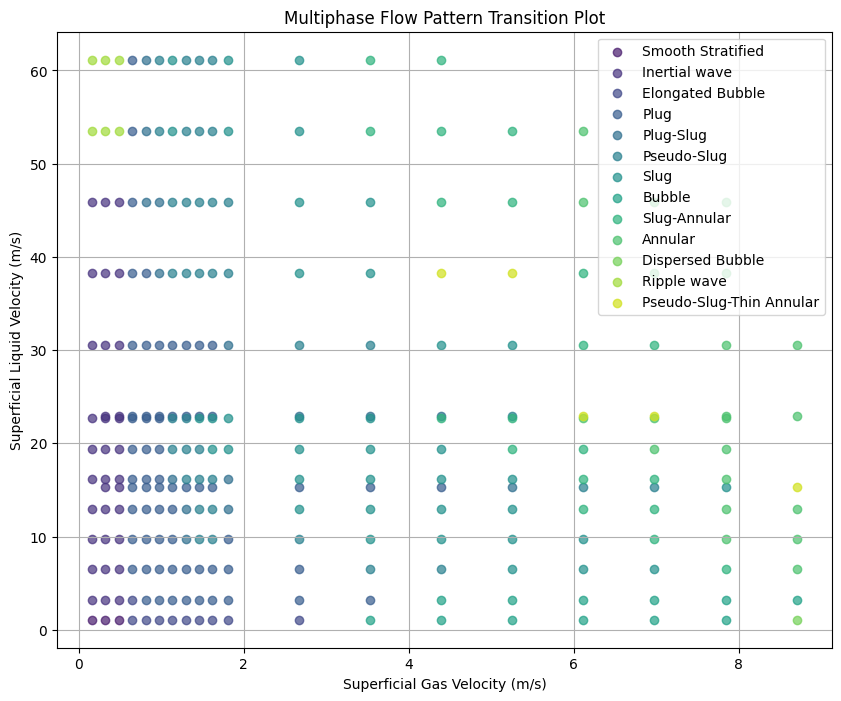

In [6]:
# Define flow patterns
flow_patterns = df['Sub-Classification'].unique()

# Set up a color palette for flow patterns
colors = sns.color_palette("viridis", len(flow_patterns))

# Plot the transition plot
plt.figure(figsize=(10, 8))

for i, pattern in enumerate(flow_patterns):
    subset = df[df['Sub-Classification'] == pattern]
    plt.scatter(subset['Liquid Superficial Velocity (ft/sec)'], subset['Gas Superficial Velocity (ft/sec)'], label=pattern, color=colors[i], alpha=0.7)

plt.xlabel('Superficial Gas Velocity (m/s)')
plt.ylabel('Superficial Liquid Velocity (m/s)')
plt.title('Multiphase Flow Pattern Transition Plot')
plt.legend()
plt.grid(True)
plt.show()